# Task 1: Price Prediction

## Performing imports and reading the data

In [187]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

external_df = pd.read_csv(r'C:\Users\ariel\PycharmProjects\DMBD-Project-2023\data\timeseries\2015\external.csv')
global_df = pd.read_csv(r'C:\Users\ariel\PycharmProjects\DMBD-Project-2023\data\timeseries\2015\global.csv')
by_actor_df = pd.read_csv(r'C:\Users\ariel\PycharmProjects\DMBD-Project-2023\data\timeseries\2015\by_actor.csv')

external_df.sort_values(by=['week', 'weekday'], inplace=True)
global_df.sort_values(by=['week', 'weekday'], inplace=True)
by_actor_df.sort_values(by=['week', 'weekday'], inplace=True)

### Based on previous correlation analysis, we will use the following features:

In [188]:
by_actor_agg = by_actor_df.groupby(['week', 'weekday']).sum()[['received', 'spent']]

merged_df = external_df.merge(global_df[['week', 'weekday', 'nb_transactions', 'total_sent_satoshi', 'mean_feeUSD']], on=['week', 'weekday'], how='left')
merged_df = merged_df.merge(by_actor_agg, on=['week', 'weekday'], how='left')
merged_df = merged_df.drop(['day', 'month', 'year'], axis=1)

C:\Users\ariel\AppData\Local\Temp\ipykernel_27568\3480150411.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_actor_agg = by_actor_df.groupby(['week', 'weekday']).sum()[['received', 'spent']]


### But we will also add the following

In [190]:
merged_df['week_mean_price'] = merged_df.groupby('week')['PriceUSD'].transform('mean')
merged_df['week_max_price'] = merged_df.groupby('week')['PriceUSD'].transform('max')
merged_df['week_min_price'] = merged_df.groupby('week')['PriceUSD'].transform('min')
merged_df['week_std_price'] = merged_df.groupby('week')['PriceUSD'].transform('std')
merged_df['week_range_price'] = merged_df['week_max_price'] - merged_df['week_min_price']
merged_df['week_start_price'] = merged_df.groupby('week')['PriceUSD'].transform('first')
merged_df['week_end_price'] = merged_df.groupby('week')['PriceUSD'].transform('last')
merged_df['week_change_price'] = merged_df['week_end_price'] - merged_df['week_start_price']

merged_df['PriceUSD_next_day'] = merged_df['PriceUSD'].shift(-1)
merged_df.dropna(inplace=True)
merged_df

,week,weekday,PriceUSD,HashRate,nb_transactions,total_sent_satoshi,mean_feeUSD,received,spent,week_mean_price,week_max_price,week_min_price,week_std_price,week_range_price,week_start_price,week_end_price,week_change_price,PriceUSD_next_day
0,0,0,315.942732,333345.017260,77439,72955568521080,4.732406e+06,3197452204940,2890104972954,287.050849,315.942732,263.334575,16.642397,52.608157,315.942732,284.342392,-31.600340,285.647310
1,0,1,285.647310,327284.198765,83644,82220189454578,4.086009e+06,6137842715668,3857427469849,287.050849,315.942732,263.334575,16.642397,52.608157,315.942732,284.342392,-31.600340,263.334575
2,0,2,263.334575,347486.927083,85893,114726942449532,6.619757e+06,8887418583785,4903184680304,287.050849,315.942732,263.334575,16.642397,52.608157,315.942732,284.342392,-31.600340,275.003852
3,0,3,275.003852,315162.561773,94862,112051728285641,4.662858e+06,5938764207692,4605127098101,287.050849,315.942732,263.334575,16.642397,52.608157,315.942732,284.342392,-31.600340,287.549521
4,0,4,287.549521,319203.107437,88386,117868258863552,4.217540e+06,6508050302807,4923258904294,287.050849,315.942732,263.334575,16.642397,52.608157,315.942732,284.342392,-31.600340,297.535565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,51,0,455.718826,752548.096734,184122,394398024621479,7.473738e+06,11733283912157,9276307990342,429.180467,455.718826,418.221532,13.761278,37.497294,455.718826,426.043647,-29.675179,418.221532
358,51,1,418.221532,794356.324330,177494,270765559424033,7.307480e+06,13685877769247,9416075683934,429.180467,455.718826,418.221532,13.761278,37.497294,455.718826,426.043647,-29.675179,422.705895
359,51,2,422.705895,952298.517472,158821,143895809619459,7.160242e+06,6469511682547,4523483274994,429.180467,455.718826,418.221532,13.761278,37.497294,455.718826,426.043647,-29.675179,421.052880
360,51,3,421.052880,701449.151894,173002,210971110168175,7.512657e+06,8289608698347,5951298072674,429.180467,455.718826,418.221532,13.761278,37.497294,455.718826,426.043647,-29.675179,431.340021


In [189]:
X = merged_df.drop(['PriceUSD_next_day','week'], axis=1)
y = merged_df['PriceUSD_next_day']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RMSE: 10.599278267813917


### Running it on the train data to see how it performs

C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with featur

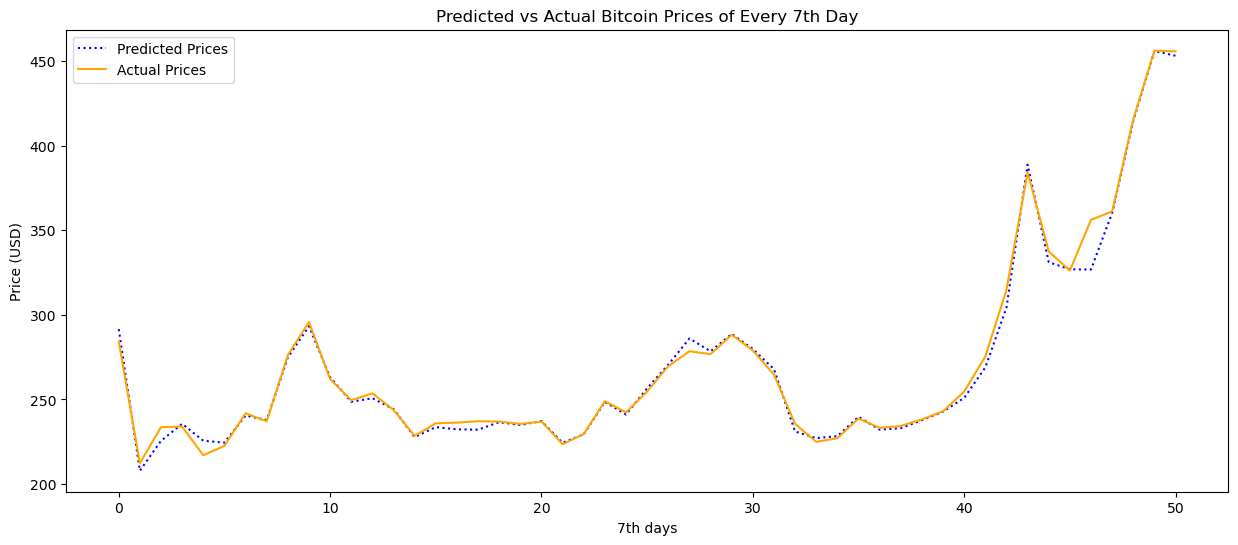

In [198]:
import matplotlib.pyplot as plt

def predict_seventh_day_price(model, data):
    predictions = []
    actual_values = []
    weeks = data['week'].unique()

    for week in weeks:
        week_data = data[data['week'] == week]
        if week_data.shape[0] >= 6:
            X_week = week_data.iloc[:6].drop(['PriceUSD_next_day','week'], axis=1)
            prediction = model.predict([X_week.iloc[-1]])[0]
            actual_value = week_data.iloc[6]['PriceUSD'] if week_data.shape[0] > 6 else np.nan
            predictions.append(prediction)
            actual_values.append(actual_value)

    return predictions, actual_values

predicted_prices_rf, actual_prices = predict_seventh_day_price(regressor, merged_df)

plt.figure(figsize=(15, 6))
plt.plot(predicted_prices_rf, 'b:', label='Predicted Prices')
plt.plot(actual_prices, label='Actual Prices', color='orange')
plt.xlabel('7th days')
plt.ylabel('Price (USD)')
plt.title('Predicted vs Actual Bitcoin Prices of Every 7th Day')
plt.legend()
plt.show()

### Using SVR

C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\skle

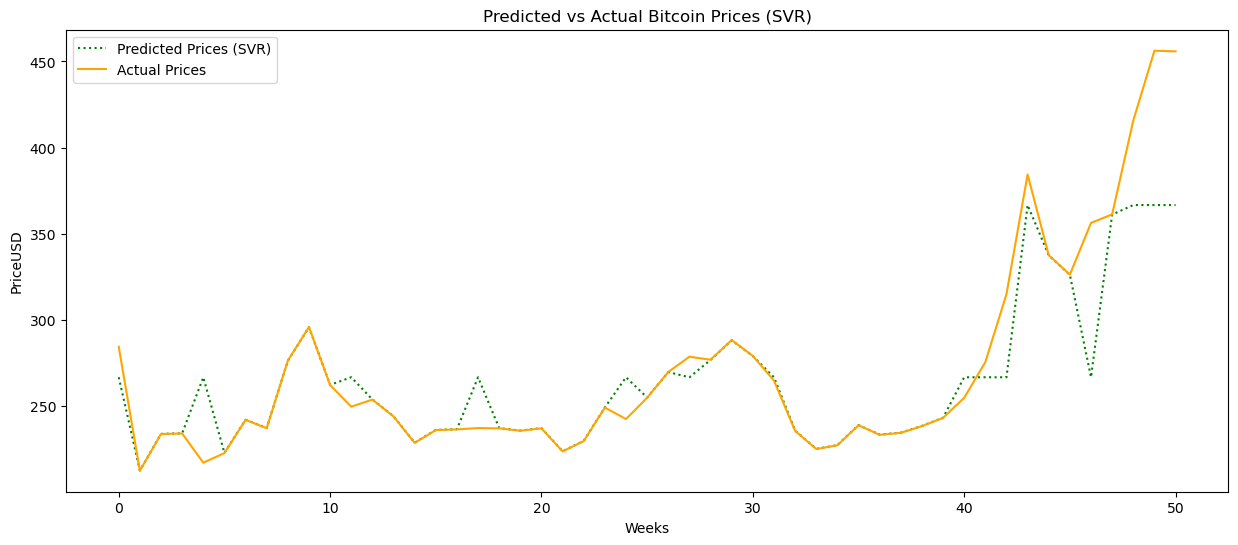

In [200]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

def predict_seventh_day_price_svr(model, data):
    predictions = []
    actual_values = []
    weeks = data['week'].unique()

    for week in weeks:
        week_data = data[data['week'] == week]
        if week_data.shape[0] >= 6:
            X_week = week_data.iloc[:6].drop(['PriceUSD_next_day', 'week'], axis=1)
            prediction = model.predict([X_week.iloc[-1]])[0]
            actual_value = week_data.iloc[6]['PriceUSD'] if week_data.shape[0] > 6 else np.nan

            predictions.append(prediction)
            actual_values.append(actual_value)

    return predictions, actual_values

predicted_prices_svr, actual_prices_svr = predict_seventh_day_price_svr(svr, merged_df)

plt.figure(figsize=(15, 6))
plt.plot(predicted_prices_svr, 'g:', label='Predicted Prices (SVR)') 
plt.plot(actual_prices_svr, 'orange', label='Actual Prices')
plt.xlabel('Weeks')
plt.ylabel('PriceUSD')
plt.title('Predicted vs Actual Bitcoin Prices (SVR)')
plt.legend()
plt.show()

To compare, let's also add the RMSE of both models

In [201]:
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

actual_prices_filtered_rf = [price for price in actual_prices if not np.isnan(price)]
predicted_prices_filtered_rf = predicted_prices_rf[:len(actual_prices_filtered_rf)]

actual_prices_filtered_svr = [price for price in actual_prices if not np.isnan(price)]
predicted_prices_filtered_svr = predicted_prices_svr[:len(actual_prices_filtered_svr)]

rmse_rf = calculate_rmse(actual_prices_filtered_rf, predicted_prices_filtered_rf)
rmse_svr = calculate_rmse(actual_prices_filtered_svr, predicted_prices_filtered_svr)

rmse_rf, rmse_svr


(5.417561945024449, 25.813122794480304)

### Using XGBoost

C:\Users\ariel\AppData\Local\Temp\ipykernel_27568\2564839677.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(predicted_prices_xgbr, 'r:', label='Predicted Prices (XGBoost)', color='red')


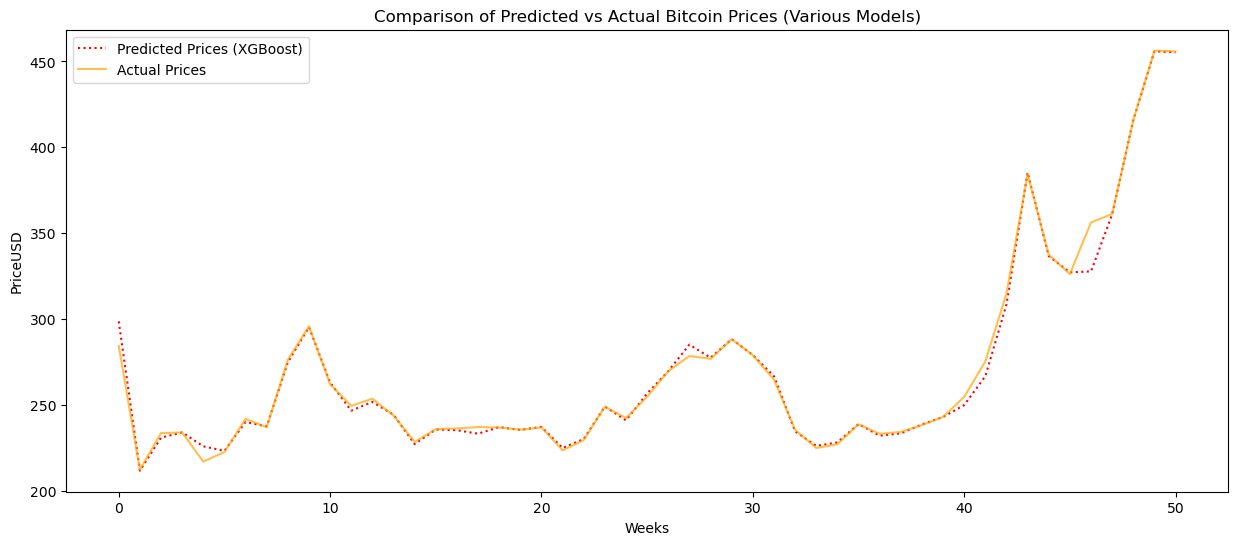

In [204]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgbr.fit(X_train, y_train)

def predict_seventh_day_pricexgb(model, data):
    predictions = []
    actual_values = []
    weeks = data['week'].unique()

    feature_names = model.get_booster().feature_names

    for week in weeks:
        week_data = data[data['week'] == week]
        if week_data.shape[0] >= 6:
            X_week = week_data[feature_names].iloc[:6]
            prediction = model.predict(X_week.iloc[-1].values.reshape(1, -1))[0]
            actual_value = week_data.iloc[6]['PriceUSD'] if week_data.shape[0] > 6 else np.nan
            predictions.append(prediction)
            actual_values.append(actual_value)

    return predictions, actual_values

predicted_prices_xgbr, actual_prices_xgbr = predict_seventh_day_pricexgb(xgbr, merged_df)

actual_prices_filtered_xgbr = [price for price in actual_prices_xgbr if not np.isnan(price)]
predicted_prices_filtered_xgbr = predicted_prices_xgbr[:len(actual_prices_filtered_xgbr)]

rmse_xgbr = calculate_rmse(actual_prices_filtered_xgbr, predicted_prices_filtered_xgbr)

plt.figure(figsize=(15, 6))
plt.plot(predicted_prices_xgbr, 'r:', label='Predicted Prices (XGBoost)', color='red')
plt.plot(actual_prices, label='Actual Prices', color='orange', alpha=0.7)
plt.xlabel('Weeks')
plt.ylabel('PriceUSD')
plt.title('Comparison of Predicted vs Actual Bitcoin Prices (Various Models)')
plt.legend()
plt.show()

## ARIMA

C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\statsmodels\tsa\statespace\

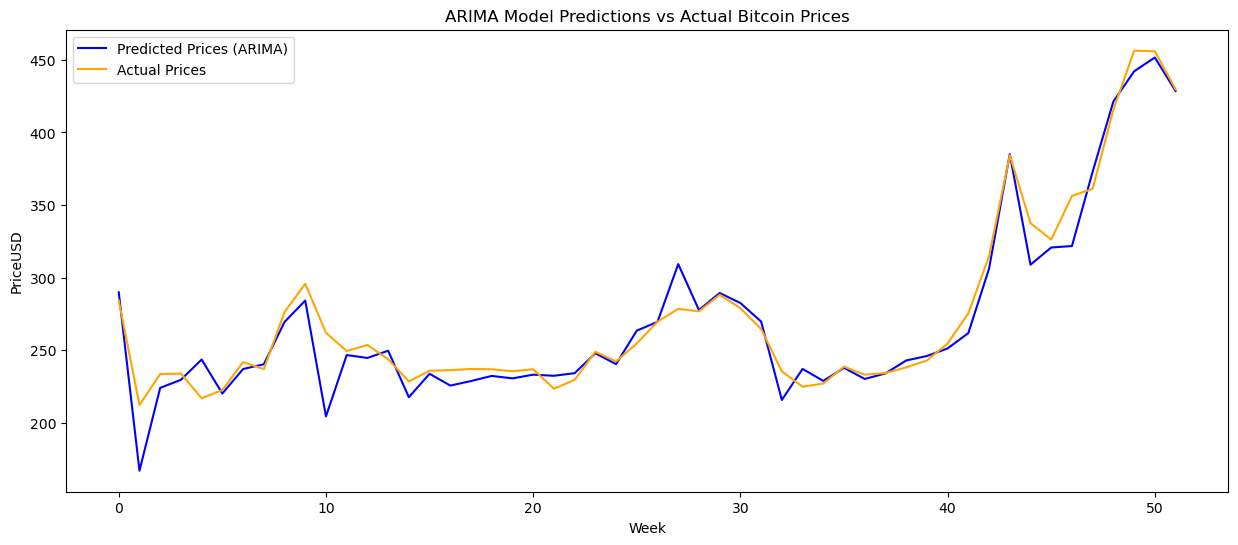

In [159]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(external_df['PriceUSD'], order=(3, 1, 1))
arima_result = arima_model.fit()

predicted_prices_arima = []
actual_prices_arima = []

unique_weeks = external_df['week'].unique()

for week in unique_weeks:
    week_data = external_df[external_df['week'] == week]['PriceUSD']

    if len(week_data) >= 6:
        model_temp = ARIMA(week_data.iloc[:6], order=(3, 1, 1))
        result_temp = model_temp.fit()
        
        forecast_temp = result_temp.forecast(steps=1)
        predicted_price = forecast_temp.iloc[0]
        predicted_prices_arima.append(predicted_price)

        actual_price = week_data.iloc[6] if len(week_data) == 7 else None
        actual_prices_arima.append(actual_price)

predicted_prices_arima = [p for p, a in zip(predicted_prices_arima, actual_prices_arima) if a is not None]
actual_prices_arima = [a for a in actual_prices_arima if a is not None]

plt.figure(figsize=(15, 6))
plt.plot(predicted_prices_arima, label='Predicted Prices (ARIMA)', color='blue')
plt.plot(actual_prices_arima, label='Actual Prices', color='orange')
plt.xlabel('Week')
plt.ylabel('PriceUSD')
plt.title('ARIMA Model Predictions vs Actual Bitcoin Prices')
plt.legend()
plt.show()

## Prophet

In [206]:
from prophet import Prophet

external_df['date'] = pd.to_datetime(external_df['year'].astype(str) + '-' + external_df['month'].astype(str) + '-' + external_df['day'].astype(str))

train_df = external_df[['date', 'PriceUSD']]
train_df.rename(columns={'date': 'ds', 'PriceUSD': 'y'}, inplace=True)

prophet_model = Prophet()
prophet_model.fit(train_df)

C:\Users\ariel\AppData\Local\Temp\ipykernel_27568\2883159128.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'date': 'ds', 'PriceUSD': 'y'}, inplace=True)
16:26:07 - cmdstanpy - INFO - Chain [1] start processing
16:26:07 - cmdstanpy - INFO - Chain [1] done processing


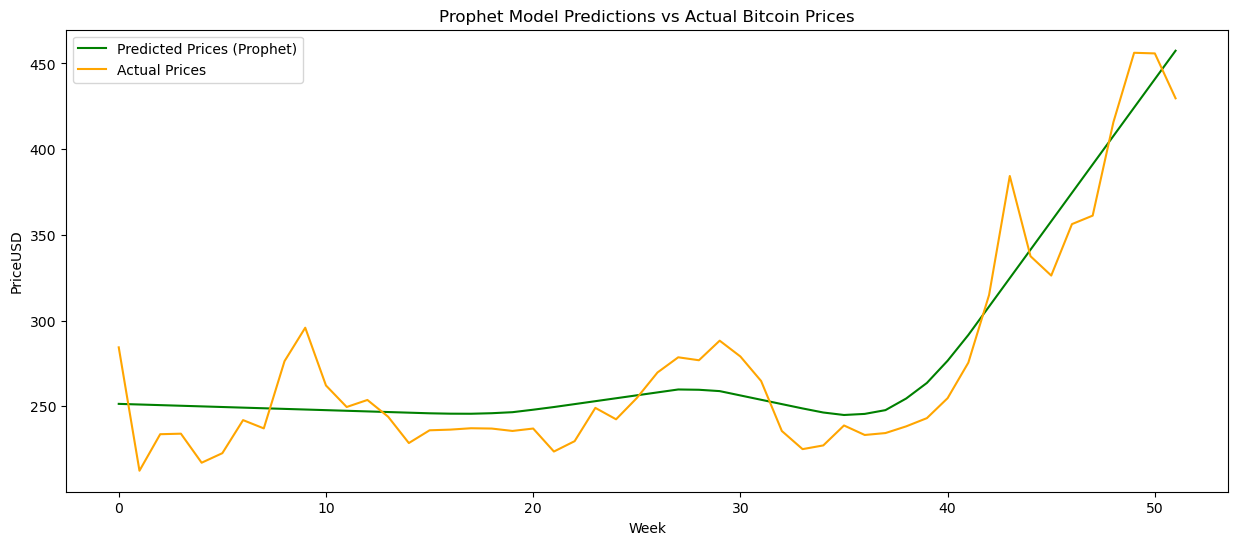

In [207]:
predicted_prices_prophet = []
actual_prices_prophet = []
unique_weeks = external_df['week'].unique()

for week in unique_weeks:
    week_data = external_df[external_df['week'] == week]
    
    if len(week_data) >= 6:
        future_date = week_data['date'].iloc[-1] + pd.Timedelta(days=1)
        future_df = pd.DataFrame({'ds': [future_date]})
        
        forecast = prophet_model.predict(future_df)
        predicted_price = forecast['yhat'].iloc[0]
        predicted_prices_prophet.append(predicted_price)

        actual_price = week_data['PriceUSD'].iloc[6] if len(week_data) == 7 else None
        actual_prices_prophet.append(actual_price)


predicted_prices_prophet = [p for p, a in zip(predicted_prices_prophet, actual_prices_prophet) if a is not None]
actual_prices_prophet = [a for a in actual_prices_prophet if a is not None]

plt.figure(figsize=(15, 6))
plt.plot(predicted_prices_prophet, label='Predicted Prices (Prophet)', color='green')
plt.plot(actual_prices_prophet, label='Actual Prices', color='orange')
plt.xlabel('Week')
plt.ylabel('PriceUSD')
plt.title('Prophet Model Predictions vs Actual Bitcoin Prices')
plt.legend()
plt.show()

Plotting all the predictions so far

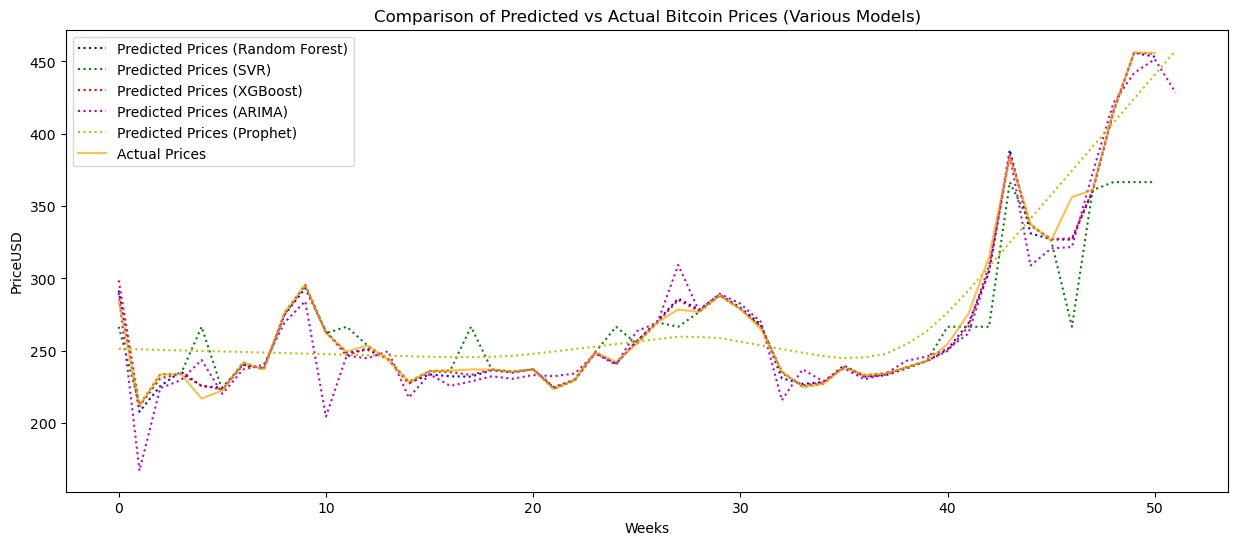

In [208]:
plt.figure(figsize=(15, 6))
plt.plot(predicted_prices_rf, 'b:', label='Predicted Prices (Random Forest)') 
plt.plot(predicted_prices_svr, 'g:', label='Predicted Prices (SVR)')  
plt.plot(predicted_prices_xgbr, 'r:', label='Predicted Prices (XGBoost)') 
plt.plot(predicted_prices_arima, 'm:', label='Predicted Prices (ARIMA)') 
plt.plot(predicted_prices_prophet, 'y:', label='Predicted Prices (Prophet)') 

plt.plot(actual_prices, 'orange', label='Actual Prices', alpha=0.7)
plt.xlabel('Weeks')
plt.ylabel('PriceUSD')
plt.title('Comparison of Predicted vs Actual Bitcoin Prices (Various Models)')
plt.legend()
plt.show()

## Evaluating the models on the train data

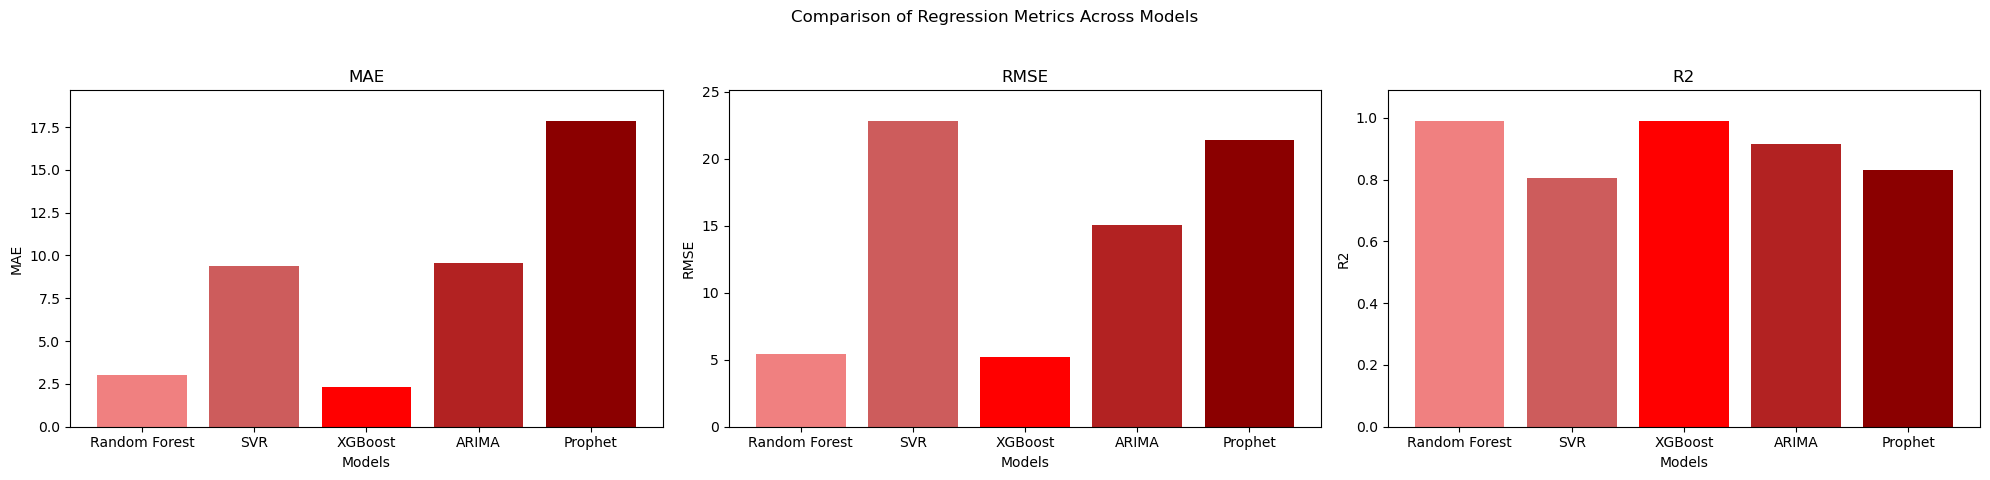

In [210]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_regression_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    return mae, rmse, r2

length_actual = len(actual_prices)-1
actual_prices_truncated = actual_prices[:length_actual]
predicted_prices_rf_truncated = predicted_prices_rf[:length_actual]
predicted_prices_svr_truncated = predicted_prices_svr[:length_actual]
predicted_prices_xgbr_truncated = predicted_prices_xgbr[:length_actual]
predicted_prices_arima_truncated = predicted_prices_arima[:length_actual]
predicted_prices_prophet_truncated = predicted_prices_prophet[:length_actual]

metrics_rf = calculate_regression_metrics(actual_prices_truncated, predicted_prices_rf_truncated)
metrics_svr = calculate_regression_metrics(actual_prices_truncated, predicted_prices_svr_truncated)
metrics_xgbr = calculate_regression_metrics(actual_prices_truncated, predicted_prices_xgbr_truncated)
metrics_arima = calculate_regression_metrics(actual_prices_truncated, predicted_prices_arima_truncated)
metrics_prophet = calculate_regression_metrics(actual_prices_truncated, predicted_prices_prophet_truncated)

metric_names = ['MAE', 'RMSE', 'R2']
models = ['Random Forest', 'SVR', 'XGBoost', 'ARIMA', 'Prophet']
all_metrics = [metrics_rf, metrics_svr, metrics_xgbr, metrics_arima, metrics_prophet]

fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=False)  # Set sharey to False
fig.suptitle('Comparison of Regression Metrics Across Models')

for idx, metric in enumerate(metric_names):
    values = [metrics[idx] for metrics in all_metrics]
    axes[idx].bar(models, values, color=['lightcoral', 'indianred', 'red', 'firebrick', 'darkred'])
    axes[idx].set_title(metric)
    axes[idx].set_xlabel('Models')
    axes[idx].set_ylabel(metric)
    axes[idx].set_ylim([0, max(values)+(0.1*max(values))])  # Set y limits for each subplot

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Time to predict

In [211]:
external_df_infer = pd.read_csv(r'C:\Users\ariel\PycharmProjects\DMBD-Project-2023\data\timeseries\task1\external.csv')
global_df_infer = pd.read_csv(r'C:\Users\ariel\PycharmProjects\DMBD-Project-2023\data\timeseries\task1\global.csv')
by_actor_df_infer = pd.read_csv(r'C:\Users\ariel\PycharmProjects\DMBD-Project-2023\data\timeseries\task1\by_actor.csv')

external_df_infer.sort_values(by=['week', 'weekday'], inplace=True)
global_df_infer.sort_values(by=['week', 'weekday'], inplace=True)
by_actor_df_infer.sort_values(by=['week', 'weekday'], inplace=True)

# Preparing data in the same way

In [219]:
by_actor_agg_infer = by_actor_df_infer.groupby(['week', 'weekday']).sum()[['received', 'spent']]

merged_df_infer = external_df_infer.merge(global_df_infer[['week', 'weekday', 'nb_transactions', 'total_sent_satoshi', 'mean_feeUSD']], on=['week', 'weekday'], how='left')
merged_df_infer = merged_df_infer.merge(by_actor_agg_infer, on=['week', 'weekday'], how='left')

merged_df_infer['week_mean_price'] = merged_df_infer.groupby('week')['PriceUSD'].transform('mean')
merged_df_infer['week_max_price'] = merged_df_infer.groupby('week')['PriceUSD'].transform('max')
merged_df_infer['week_min_price'] = merged_df_infer.groupby('week')['PriceUSD'].transform('min')
merged_df_infer['week_std_price'] = merged_df_infer.groupby('week')['PriceUSD'].transform('std')
merged_df_infer['week_range_price'] = merged_df_infer['week_max_price'] - merged_df_infer['week_min_price']
merged_df_infer['week_start_price'] = merged_df_infer.groupby('week')['PriceUSD'].transform('first')
merged_df_infer['week_end_price'] = merged_df_infer.groupby('week')['PriceUSD'].transform('last')
merged_df_infer['week_change_price'] = merged_df_infer['week_end_price'] - merged_df_infer['week_start_price']

merged_df_infer.dropna(inplace=True)

C:\Users\ariel\AppData\Local\Temp\ipykernel_27568\2937646709.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_actor_agg_infer = by_actor_df_infer.groupby(['week', 'weekday']).sum()[['received', 'spent']]


## Inferring with Random Forest

C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with featur

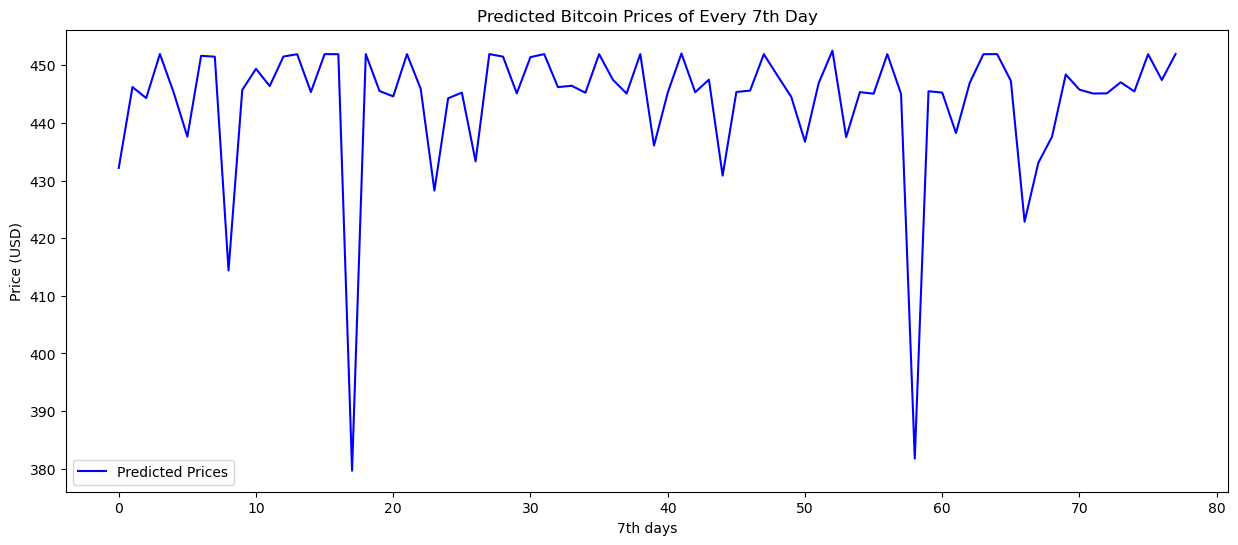

In [226]:
def infer_price(model, data):
    predictions = []
    weeks = data['week'].unique()

    for week in weeks:
        week_data = data[data['week'] == week]
        if week_data.shape[0] >= 6:
            X_week = week_data.iloc[:6].drop(['week'], axis=1)
            prediction = model.predict([X_week.iloc[-1]])[0]
            predictions.append(prediction)
    return predictions

inferred_prices_rf = infer_price(regressor, merged_df_infer)
plt.figure(figsize=(15, 6))
plt.plot(inferred_prices_rf, label='Predicted Prices', color='blue')
plt.xlabel('7th days')
plt.ylabel('Price (USD)')
plt.title('Predicted Bitcoin Prices of Every 7th Day')
plt.legend()
plt.show()

## Inferring with SVR

C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\skle

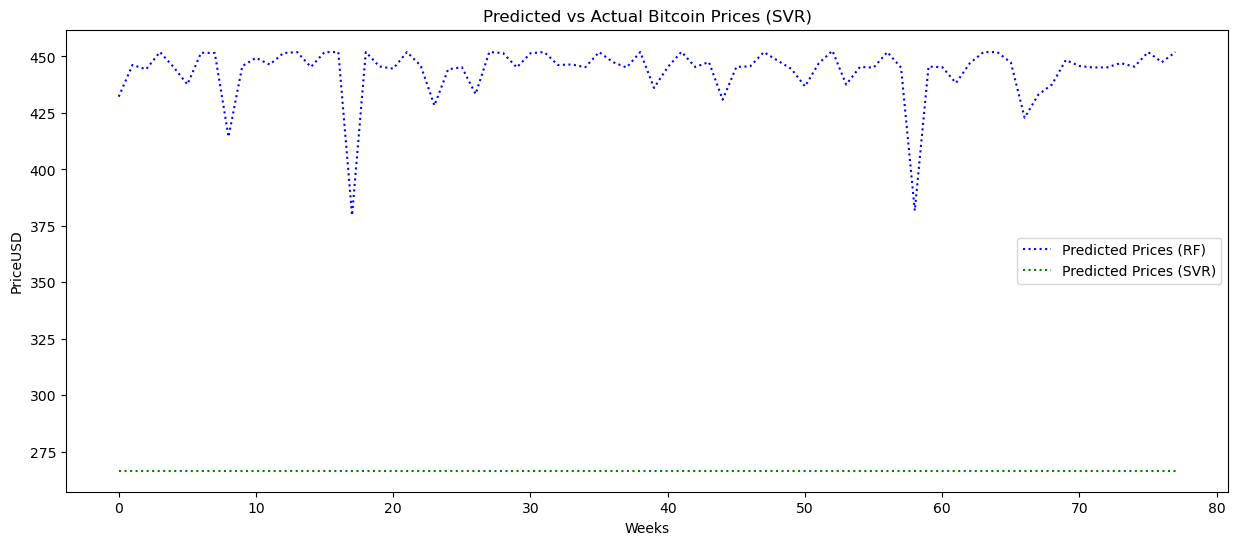

In [228]:
def infer_seventh_day_price_svr(model, data):
    predictions = []
    weeks = data['week'].unique()

    for week in weeks:
        week_data = data[data['week'] == week]
        if week_data.shape[0] >= 6:
            X_week = week_data.iloc[:6].drop(['week'], axis=1)
            prediction = model.predict([X_week.iloc[-1]])[0]
            predictions.append(prediction)
    return predictions

inferred_prices_svr = infer_seventh_day_price_svr(svr, merged_df_infer)

plt.figure(figsize=(15, 6))
plt.plot(inferred_prices_rf, 'b:', label='Predicted Prices (RF)')  
plt.plot(inferred_prices_svr, 'g:', label='Predicted Prices (SVR)') 
plt.xlabel('Weeks')
plt.ylabel('PriceUSD')
plt.title('Predicted vs Actual Bitcoin Prices (SVR)')
plt.legend()
plt.show()

## Inferring with XGBoost

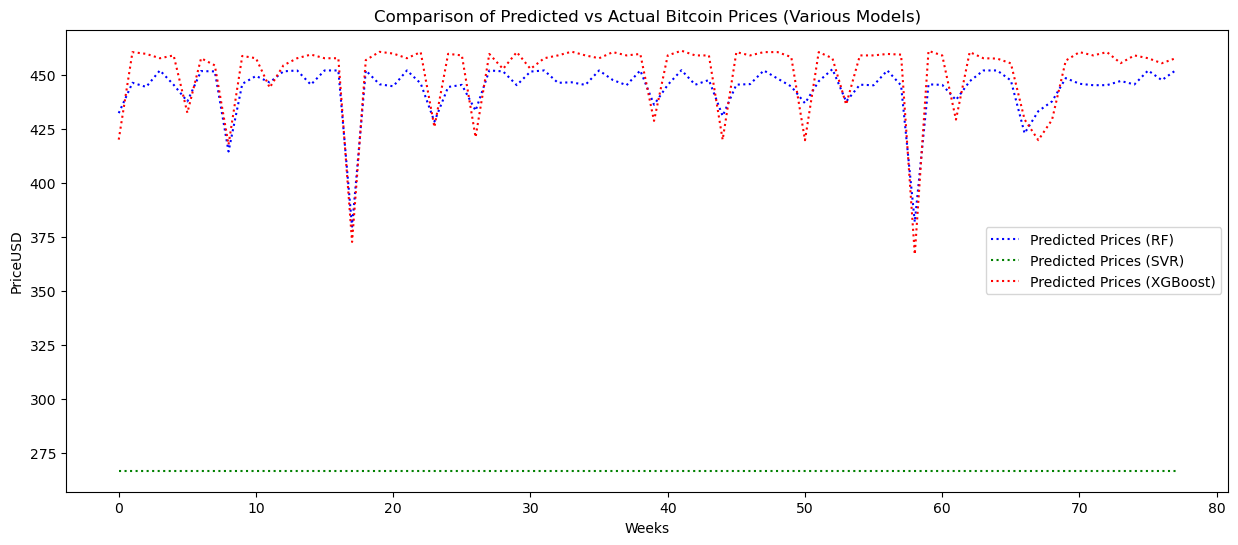

In [229]:
def infer_seventh_day_pricexgb(model, data):
    predictions = []
    weeks = data['week'].unique()

    feature_names = model.get_booster().feature_names

    for week in weeks:
        week_data = data[data['week'] == week]
        if week_data.shape[0] >= 6:
            X_week = week_data[feature_names].iloc[:6]
            prediction = model.predict(X_week.iloc[-1].values.reshape(1, -1))[0]
            predictions.append(prediction)
    return predictions

inferred_prices_xgbr = infer_seventh_day_pricexgb(xgbr, merged_df_infer)

plt.figure(figsize=(15, 6))
plt.plot(inferred_prices_rf, 'b:', label='Predicted Prices (RF)')  
plt.plot(inferred_prices_svr, 'g:', label='Predicted Prices (SVR)') 
plt.plot(inferred_prices_xgbr, 'r:', label='Predicted Prices (XGBoost)')
plt.xlabel('Weeks')
plt.ylabel('PriceUSD')
plt.title('Comparison of Predicted vs Actual Bitcoin Prices (Various Models)')
plt.legend()
plt.show()

## Inferring with ARIMA

C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ariel\anaconda3\envs\Stage_M1_PIL\lib\site-packages\statsmodels\tsa\statespace\

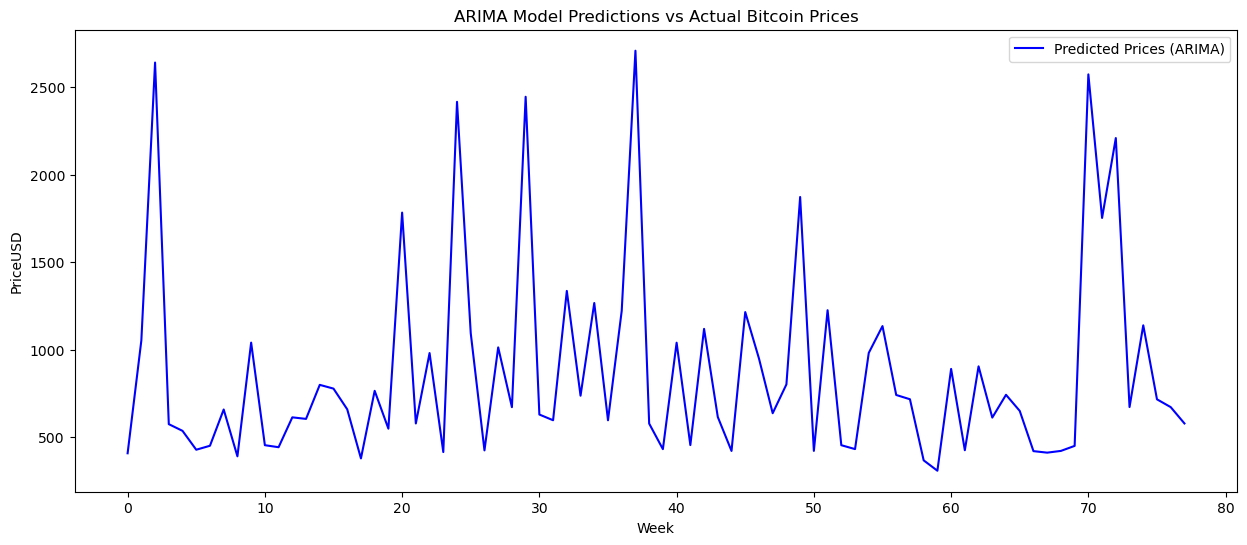

In [230]:
inferred_prices_arima = []

unique_weeks = external_df_infer['week'].unique()

for week in unique_weeks:
    week_data = external_df_infer[external_df_infer['week'] == week]['PriceUSD']
    
    if len(week_data) >= 6:
        model_temp = ARIMA(week_data.iloc[:6], order=(1, 1, 1))
        result_temp = model_temp.fit()
        
        forecast = result_temp.forecast(steps=7)
        predicted_price = forecast.iloc[-1]
        inferred_prices_arima.append(predicted_price)
    
plt.figure(figsize=(15, 6))
plt.plot(inferred_prices_arima, label='Predicted Prices (ARIMA)', color='blue')
plt.xlabel('Week')
plt.ylabel('PriceUSD')
plt.title('ARIMA Model Predictions vs Actual Bitcoin Prices')
plt.legend()
plt.show()

## Inferring with Prophet

16:40:56 - cmdstanpy - INFO - Chain [1] start processing
16:40:56 - cmdstanpy - INFO - Chain [1] done processing
16:40:57 - cmdstanpy - INFO - Chain [1] start processing
16:40:57 - cmdstanpy - INFO - Chain [1] done processing
16:40:57 - cmdstanpy - INFO - Chain [1] start processing
16:40:57 - cmdstanpy - INFO - Chain [1] done processing
16:40:57 - cmdstanpy - INFO - Chain [1] start processing
16:40:57 - cmdstanpy - INFO - Chain [1] done processing
16:40:57 - cmdstanpy - INFO - Chain [1] start processing
16:40:57 - cmdstanpy - INFO - Chain [1] done processing
16:40:58 - cmdstanpy - INFO - Chain [1] start processing
16:40:58 - cmdstanpy - INFO - Chain [1] done processing
16:40:58 - cmdstanpy - INFO - Chain [1] start processing
16:40:58 - cmdstanpy - INFO - Chain [1] done processing
16:40:58 - cmdstanpy - INFO - Chain [1] start processing
16:40:58 - cmdstanpy - INFO - Chain [1] done processing
16:40:58 - cmdstanpy - INFO - Chain [1] start processing
16:40:58 - cmdstanpy - INFO - Chain [1]

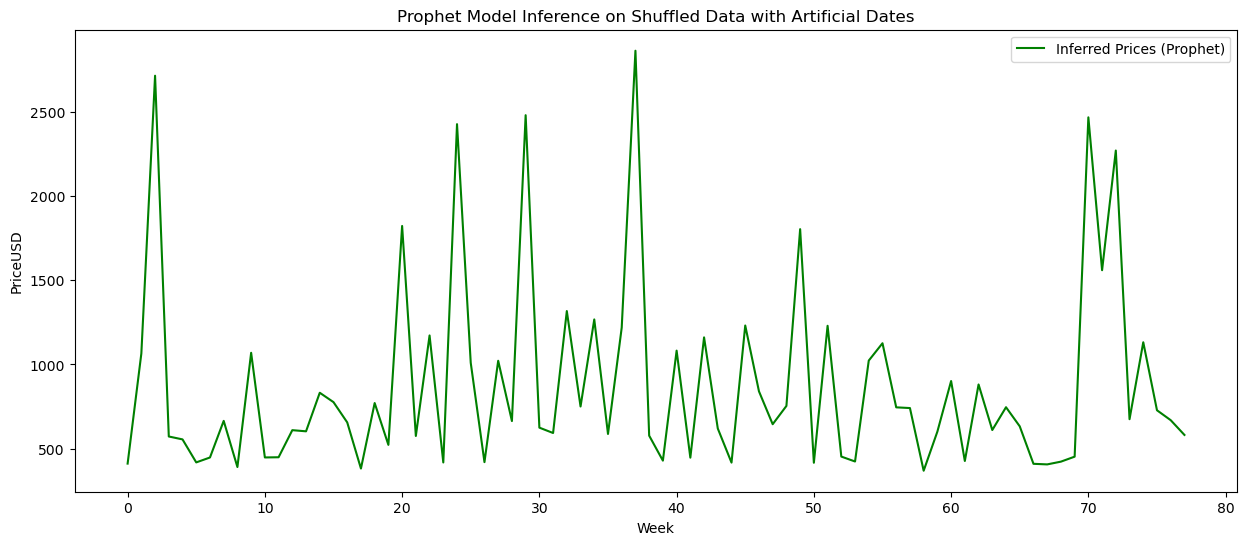

In [232]:
start_date = pd.to_datetime('2021-01-01')  #making up dates since we 'dont have them'
date_range = pd.date_range(start_date, periods=len(external_df_infer), freq='D')
external_df_infer['date'] = date_range

unique_weeks = external_df_infer['week'].unique()
inferred_prices_prophet = []

for week in unique_weeks:
    week_data = external_df_infer[external_df_infer['week'] == week]

    if len(week_data) >= 6:
        # Prepare the data for Prophet
        df_week = pd.DataFrame({
            'ds': week_data['date'].iloc[:6],
            'y': week_data['PriceUSD'].iloc[:6]
        })

        # Initialize and fit the Prophet model
        model_week = Prophet()
        model_week.fit(df_week)

        # Forecast the next day (7th day)
        future = model_week.make_future_dataframe(periods=1, include_history=False)
        forecast = model_week.predict(future)
        predicted_price = forecast['yhat'].iloc[0]
        inferred_prices_prophet.append(predicted_price)

# Plotting the inferred prices
plt.figure(figsize=(15, 6))
plt.plot(inferred_prices_prophet, label='Inferred Prices (Prophet)', color='green')
plt.xlabel('Week')
plt.ylabel('PriceUSD')
plt.title('Prophet Model Inference on Shuffled Data with Artificial Dates')
plt.legend()
plt.show()

## Just for fun, plotting the mean and median of the prices

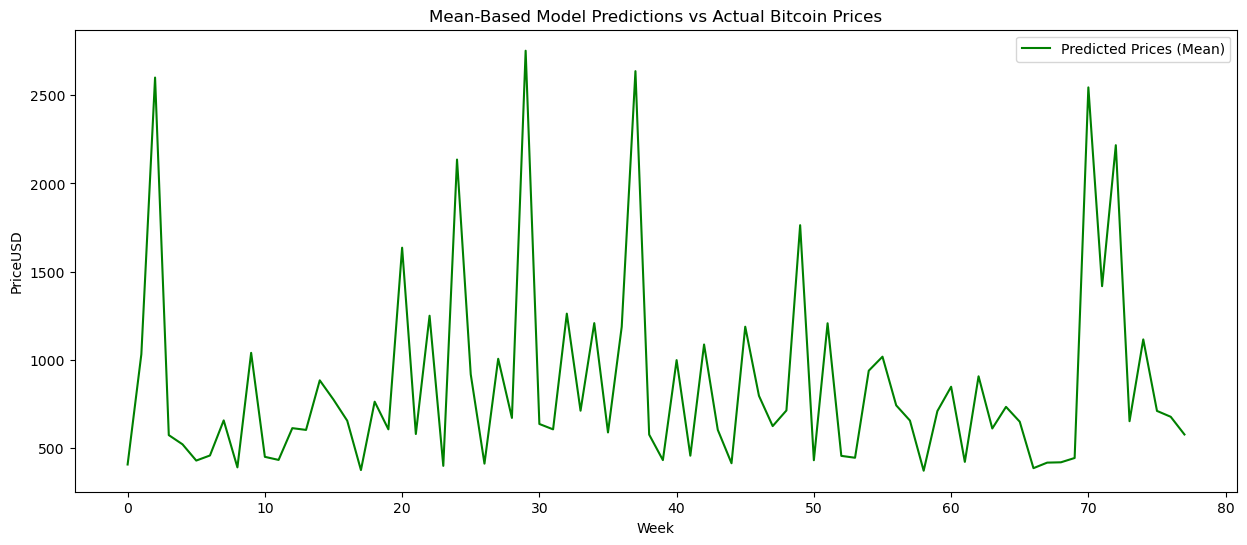

In [171]:
inferred_prices_mean = []
unique_weeks = external_df_infer['week'].unique()

for week in unique_weeks:
    week_data = external_df_infer[external_df_infer['week'] == week]['PriceUSD']
    
    if len(week_data) >= 6:
        mean_price = week_data.iloc[:6].mean()
        inferred_prices_mean.append(mean_price)
    
plt.figure(figsize=(15, 6))
plt.plot(inferred_prices_mean, label='Predicted Prices (Mean)', color='green')
plt.xlabel('Week')
plt.ylabel('PriceUSD')
plt.title('Mean-Based Model Predictions vs Actual Bitcoin Prices')
plt.legend()
plt.show()

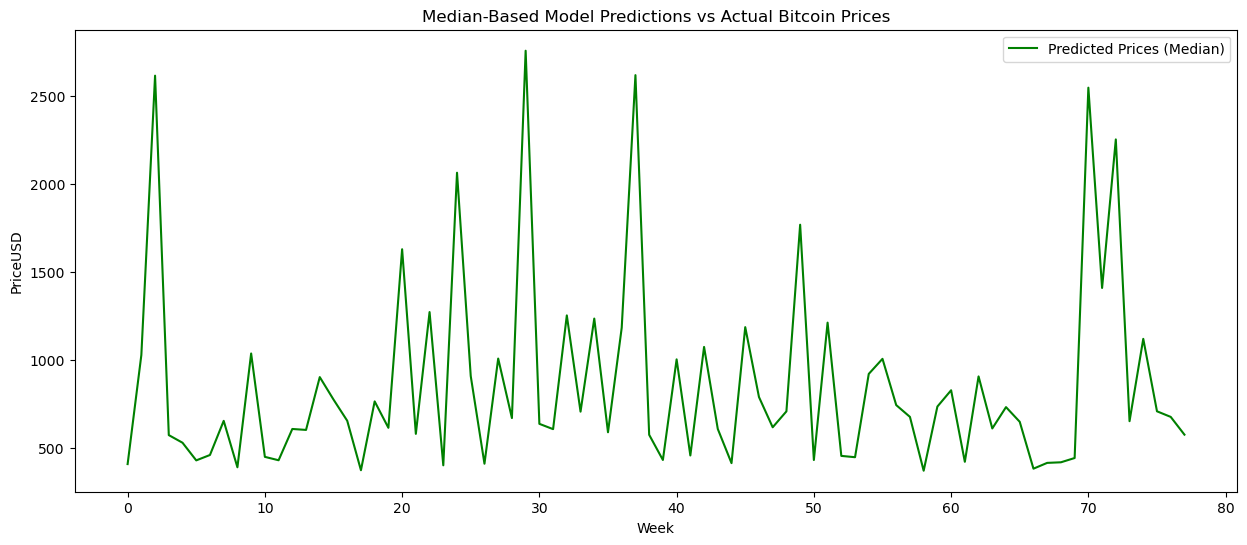

In [172]:
inferred_prices_median = []
unique_weeks = external_df_infer['week'].unique()

for week in unique_weeks:
    week_data = external_df_infer[external_df_infer['week'] == week]['PriceUSD']
    
    if len(week_data) >= 6:
        mean_price = week_data.iloc[:6].median()
        inferred_prices_median.append(mean_price)
    
plt.figure(figsize=(15, 6))
plt.plot(inferred_prices_median, label='Predicted Prices (Median)', color='green')
plt.xlabel('Week')
plt.ylabel('PriceUSD')
plt.title('Median-Based Model Predictions vs Actual Bitcoin Prices')
plt.legend()
plt.show()

# Plotting everything

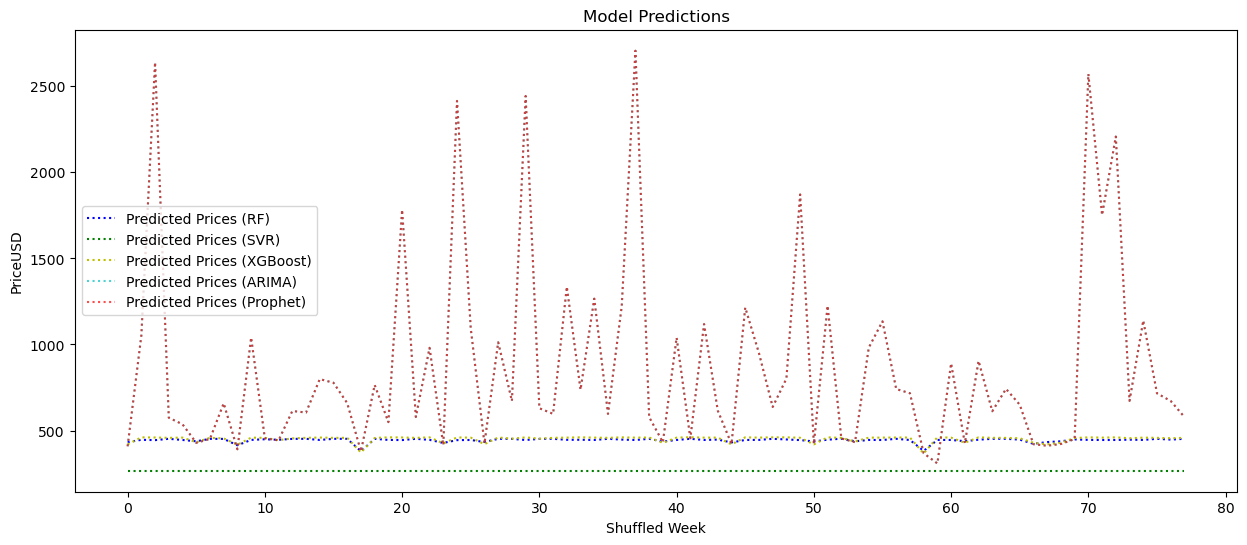

In [240]:
plt.figure(figsize=(15, 6))
plt.plot(inferred_prices_rf, 'b:', label='Predicted Prices (RF)')  
plt.plot(inferred_prices_svr, 'g:', label='Predicted Prices (SVR)') 
plt.plot(inferred_prices_xgbr, 'y:', label='Predicted Prices (XGBoost)')
plt.plot(inferred_prices_arima, 'c:', label='Predicted Prices (ARIMA)', alpha=0.7)
plt.plot(inferred_prices_arima, 'r:', label='Predicted Prices (Prophet)', alpha=0.7)

#plt.plot(inferred_prices_mean, label='Weekly Means', color='purple', alpha=0.4)
plt.xlabel('Shuffled Week')
plt.ylabel('PriceUSD')
plt.title('Model Predictions')
plt.legend()
plt.show()

### Outputting to csv

In [241]:
df = pd.DataFrame({
    'week': range(1, len(inferred_prices_arima) + 1),
    'weekday': [6] * len(inferred_prices_arima),
    'PriceUSD': inferred_prices_arima
})

df.to_csv('value_pred.csv', index=False)

In [ ]:
# The end